In [19]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

In [20]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [21]:
x_train = x_train / 255.0
x_test = x_test / 255.0

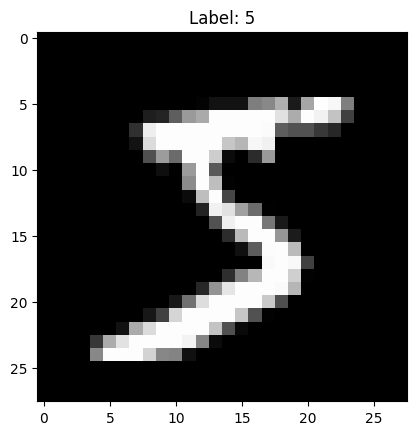

In [22]:
plt.imshow(x_train[0], cmap='gray')
plt.title(f"Label: {y_train[0]}")
plt.show()

In [23]:
model = models.Sequential([
    layers.Flatten(input_shape=(28, 28)),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')  # 10 classes (0 to 9)
])

In [24]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [25]:
model.fit(x_train, y_train, epochs=5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.8731 - loss: 0.4382
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9648 - loss: 0.1214
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9780 - loss: 0.0774
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9807 - loss: 0.0600
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9861 - loss: 0.0433


In [26]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f"Test Accuracy: {test_acc:.4f}")

313/313 - 1s - 2ms/step - accuracy: 0.9771 - loss: 0.0780
Test Accuracy: 0.9771


In [38]:
from google.colab import files
uploaded = files.upload()

Saving letter.png to letter.png


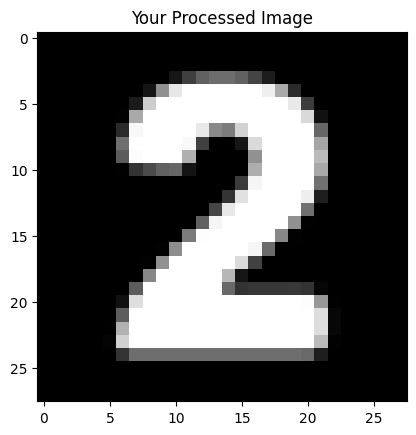

In [39]:

img_path = list(uploaded.keys())[0]  # Get filename

img = Image.open(img_path).convert('L')  # Convert to grayscale
img = img.resize((28, 28))               # Resize

img_array = np.array(img)
img_array = 255 - img_array              # Invert: dark digit on white background
img_array = img_array / 255.0            # Normalize

img_array = img_array.reshape(1, 28, 28)

plt.imshow(img_array[0], cmap='gray')
plt.title("Your Processed Image")
plt.show()

In [40]:

prediction = model.predict(img_array)
predicted_digit = np.argmax(prediction)

print(f"Predicted Digit: {predicted_digit}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
Predicted Digit: 2
